## Importación de librerlías

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
from datetime import datetime

## Desactivación de Warnings

In [268]:
warnings.filterwarnings("ignore")

## Importación de datos

In [269]:
df1 = pd.read_excel('data/homicidios.xlsx', sheet_name='HECHOS')
df2 = pd.read_excel('data/homicidios.xlsx', sheet_name='VICTIMAS')

## Primera inspección de los datos HECHOS

In [270]:
df1.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [271]:
df1.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [272]:
print(df1.shape)

(696, 21)


In [273]:
print(df1['ID'].nunique())

696


## Primera inspección de los datos VICTIMAS

In [274]:
df2.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [275]:
df2.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [276]:
print(df2.shape)

(717, 10)


In [277]:
print(df2['ID_hecho'].nunique())

696


### Ya que se encuentra una exactitud entre las dos hojas de las bases de datos según el ID y la fecha, se procede a unir las dos bases de datos en una sola para su posterior análisis y fácil manejo.

## Unión de los datos HECHOS y VICTIMAS

In [278]:
df3 = df1.merge(df2, left_on=['ID','FECHA'], right_on=['ID_hecho','FECHA'], how='left')

## Primer exploración del dataset resultante de unir los datos HECHOS y VICTIMAS


In [279]:
df3.head()

,ID,N_VICTIMAS,FECHA,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ACUSADO,ID_hecho,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,AUTO,2016-0001,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,PASAJEROS,2016-0002,2016.0,1.0,2.0,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,AUTO,2016-0003,2016.0,1.0,3.0,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,SD,2016-0004,2016.0,1.0,10.0,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,PASAJEROS,2016-0005,2016.0,1.0,21.0,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [280]:
df3.shape

(717, 30)

In [281]:
df3.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'ID_hecho', 'AAAA_y', 'MM_y',
       'DD_y', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

### Limpieza del nombre por Join

In [282]:
# Itera a través de las columnas del DataFrame
for columna in df3.columns:
    # Verifica si la columna termina con "_x"
    if columna.endswith("_x"):
        # Renombra la columna eliminando "_x" al final
        nuevo_nombre = columna[:-2]  # Elimina los últimos dos caracteres ("_x")
        df3.rename(columns={columna: nuevo_nombre}, inplace=True)

### Encuentro que en el join realizado se duplican algunas columnas, por lo que se procede a eliminarlas para evitar problemas en el análisis posterior.

## Eliminación de columnas duplicadas

In [283]:
df3 = df3.drop(['ID_hecho','AAAA_y','MM_y','DD_y','VICTIMA_y'], axis=1)

In [284]:
df3.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [285]:
df3.shape

(717, 25)

In [286]:
df3.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


## Inspección primer EDA del dataset resultante someramente 

## 1. Análisis Inicial
### Visualizar las primeras filas del DataFrame

In [287]:
df3.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,2016-02-01 00:00:00


### Resumen estadístico de las variables numéricas

In [288]:
df3.describe()

,N_VICTIMAS,AAAA,MM,DD,Altura,COMUNA
count,717.000000,717.000000,717.000000,717.000000,133.000000,717.000000
mean,1.061367,2018.174338,6.688982,15.953975,3384.187970,7.430962
std,0.257024,1.672655,3.575140,8.674876,3095.161836,4.385067
min,1.000000,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017.000000,4.000000,9.000000,1366.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,2639.000000,8.000000
75%,1.000000,2019.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,16080.000000,15.000000


### Información general del DataFrame

In [289]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

### En primera instancia voy a usar la librería pandas_profiling para hacer un primer análisis exploratorio de los datos y ver que información me puede arrojar, el cual me va a brindar ciertos insights en los cuales puedo enfatizar en un futuro.

In [290]:
# Definición de la librería
profile = ProfileReport(df3, title='Pandas Profiling Report', explorative=True)

# Exportar el reporte como archivo html
profile.to_file(output_file="homicidios.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [291]:
# Generar el informe en el notebook
profile.to_notebook_iframe()

## 2. Tratar Valores Faltantes
### Identificar valores faltantes

In [292]:
# Calcular el porcentaje de valores faltantes en cada columna
porcentaje_faltantes = (df3.isnull().sum() / len(df3)) * 100

# Crear un DataFrame con el porcentaje de faltantes
df_faltantes = pd.DataFrame({'Columna': df3.columns, 'Porcentaje de Faltantes': porcentaje_faltantes})

# Ordenar el DataFrame por el porcentaje de faltantes de manera descendente
df_faltantes = df_faltantes.sort_values(by='Porcentaje de Faltantes', ascending=False)

# Mostrar el DataFrame con los porcentajes de faltantes
print(df_faltantes)


                                     Columna  Porcentaje de Faltantes
Altura                                Altura                81.450488
Cruce                                  Cruce                24.686192
Dirección Normalizada  Dirección Normalizada                 1.255230
EDAD                                    EDAD                 0.278940
SEXO                                    SEXO                 0.278940
ROL                                      ROL                 0.278940
FECHA_FALLECIMIENTO      FECHA_FALLECIMIENTO                 0.278940
Calle                                  Calle                 0.139470
HH                                        HH                 0.000000
pos y                                  pos y                 0.000000
FECHA                                  FECHA                 0.000000
AAAA                                    AAAA                 0.000000
MM                                        MM                 0.000000
ACUSADO             

### Debido a que las columnas Altura y Cruce del dataframe tienen 81% y 24% de valores faltantes respectivamente, se decide eliminarlas del dataframe ya que no aportrian información relevante para el análisis. 

### Teniendo en cuenta que en lo posible se debe evitar eliminar datos, y que en lo posible se debe tratar de imputar los valores faltantes, en el primer caso de la altura se contaría con muy poca información para hacer una imputación, ya que los valores no son números como tal, sino la altura de la arteria donde se produjo el hecho, entonces prácticamente los valores imputados serían aleatorios.

### Y en el caso de la columna Cruce es una variable categórica, entonces imputarla sería prácitcamente imposible, ya que no se podría hacer una imputación por la media, mediana o moda, sino que se tendría que hacer una imputación por la categoría más frecuente, lo cual no sería muy acertado.

In [293]:
df3 = df3.drop(['Altura','Cruce'], axis=1)

##  Eliminar todas las filas con valores nulos o faltantes en el DataFrame df3

In [294]:
df3 = df3.dropna()

### Verificamos que se hayan eliminado las filas con valores nulos o faltantes

In [295]:
df3.isnull().sum()

ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    0
Dirección Normalizada    0
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
VICTIMA                  0
ACUSADO                  0
ROL                      0
SEXO                     0
EDAD                     0
FECHA_FALLECIMIENTO      0
dtype: int64

In [296]:
df3.shape

(706, 23)

### Por la naturaleza del dataset, según el diccionario guía, el mismo tiene una nomenclatura que identifica con 'SD' el resto de valores faltantes, además de los identificados anteriormente, quizá esta identificación fue hecha manualmente por el personal que recolectó la información, por lo que se procede a identificar el porcentaje de valores 'SD' para decidir que hacemos con ellos.

In [297]:
# Crear un diccionario para almacenar los porcentajes de columnas que contienen "SD"
porcentajes_sd_contiene = {}

# Valor que se desea buscar
valor_a_buscar = "SD"

# Iterar a través de las columnas de df3
for columna in df3.columns:
    # Contar el número de veces que "SD" está contenido en la columna
    total_valores = len(df3[columna])
    conteo_sd_contiene = df3[columna].apply(lambda x: valor_a_buscar in str(x)).sum()
    
    # Calcular el porcentaje de columnas que contienen "SD" en la columna
    porcentaje = (conteo_sd_contiene / total_valores) * 100
    
    # Almacenar el porcentaje en el diccionario
    porcentajes_sd_contiene[columna] = porcentaje

# Mostrar los porcentajes de columnas que contienen "SD" en cada columna
print("Porcentaje de columnas que contienen 'SD' en cada columna:")
for columna, porcentaje in porcentajes_sd_contiene.items():
    print(f"{columna}: {porcentaje:.2f}%")


Porcentaje de columnas que contienen 'SD' en cada columna:
ID: 0.00%
N_VICTIMAS: 0.00%
FECHA: 0.00%
AAAA: 0.00%
MM: 0.00%
DD: 0.00%
HORA: 0.14%
HH: 0.14%
LUGAR_DEL_HECHO: 0.00%
TIPO_DE_CALLE: 0.00%
Calle: 0.00%
Dirección Normalizada: 0.00%
COMUNA: 0.00%
XY (CABA): 0.00%
pos x: 0.00%
pos y: 0.00%
PARTICIPANTES: 3.40%
VICTIMA: 1.27%
ACUSADO: 2.83%
ROL: 1.42%
SEXO: 0.42%
EDAD: 7.08%
FECHA_FALLECIMIENTO: 9.21%


### Observamos que el mayor porcentaje de datos con 'SD' está en la columna FECHA_FALLECIMIENTO con un 9.21%, dado que no es un porcentaje significativo de la información, se decide eliminar las filas que contengan 'SD' en cualquier columna.

In [298]:
# Definir el valor que se desea buscar
valor_a_buscar = "SD"

# Crear una máscara booleana que identifique las filas que contienen "SD" en cualquier columna
filas_con_sd = df3.apply(lambda row: valor_a_buscar in row.values, axis=1)

# Eliminar las filas que contienen "SD"
df3 = df3[~filas_con_sd]

## 3. Tratar Duplicados

### Identificar y eliminar duplicados

In [299]:
# Identificar filas duplicadas en el DataFrame df3
duplicados = df3[df3.duplicated()]

# Mostrar las filas duplicadas
print("Filas Duplicadas:")
print(duplicados)


Filas Duplicadas:
Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Dirección Normalizada, COMUNA, XY (CABA), pos x, pos y, PARTICIPANTES, VICTIMA, ACUSADO, ROL, SEXO, EDAD, FECHA_FALLECIMIENTO]
Index: []

[0 rows x 23 columns]


In [300]:
# Eliminar filas duplicadas y mantener la primera aparición
df3 = df3.drop_duplicates(keep='first')

## 4. Tratar tipos de datos

In [301]:
df3.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
ROL                              object
SEXO                             object
EDAD                             object
FECHA_FALLECIMIENTO              object
dtype: object

![Imgur](https://i.imgur.com/r5tV24M.png)

### Gracias al primer reporte generado por la librería pandas_profiling, se puede observar que alguans columnas tienen un tipo de dato que no corresponde con el tipo de dato que debería tener, por lo que se procede a cambiar el tipo de dato de las columnas correspondientes.

### También lo note porque aplicando el método dtypes encontré que esas columnas tenían un tipo de dato object, cuando deberían ser numéricas, por la naturaleza del dato.

In [305]:
# Convertir la columna 'HH' al tipo de datos int
df3['HH'] = df3['HH'].astype(int)

# Convertir la columna 'EDAD' al tipo de datos int
df3['EDAD'] = df3['EDAD'].astype(int)

### Verificamos que todas las columnas quedaron con el tipo de dato correspondiente

In [306]:
df3.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                                int64
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
ROL                              object
SEXO                             object
EDAD                              int64
FECHA_FALLECIMIENTO              object
dtype: object

## 5. Análisis de Outliers

### Utilizar gráficos boxplot para identificar outliers en variables numéricas

In [308]:
# Identificar columnas numéricas automáticamente
columnas_numericas = df3.select_dtypes(include=['number']).columns

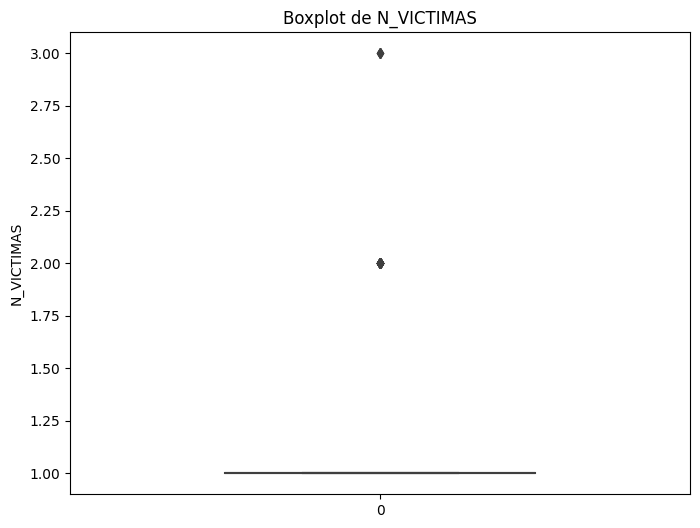

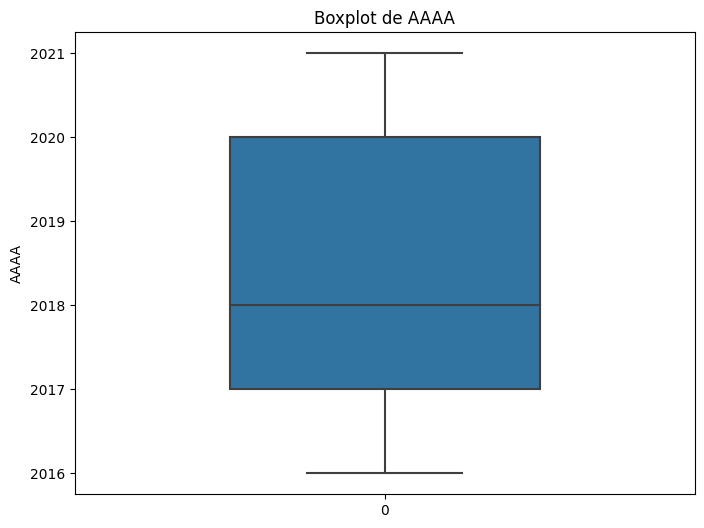

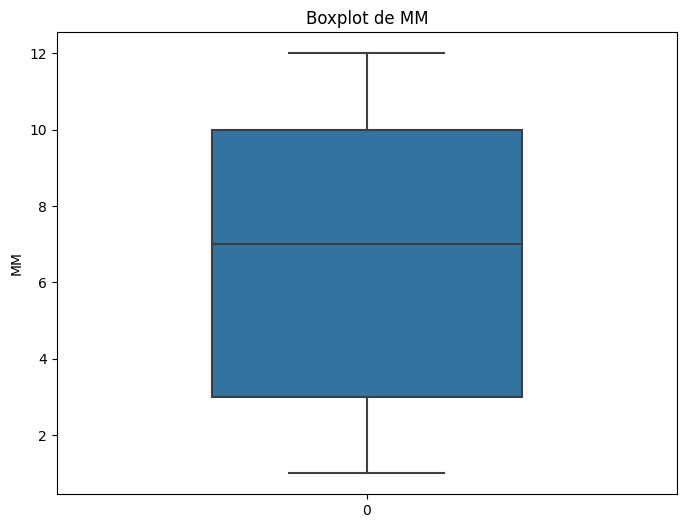

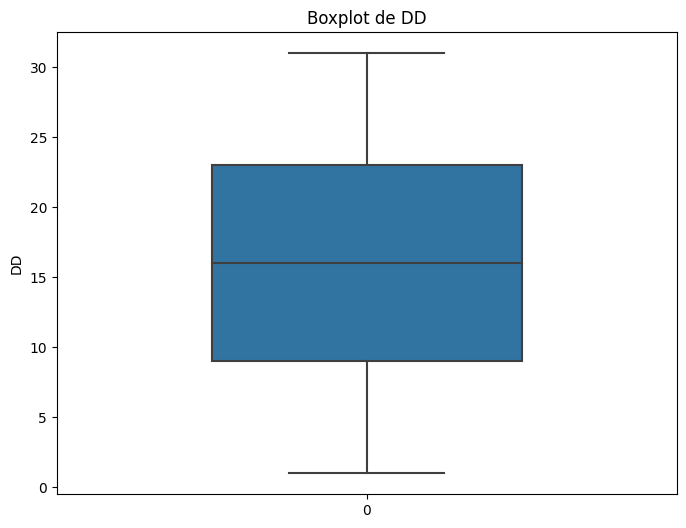

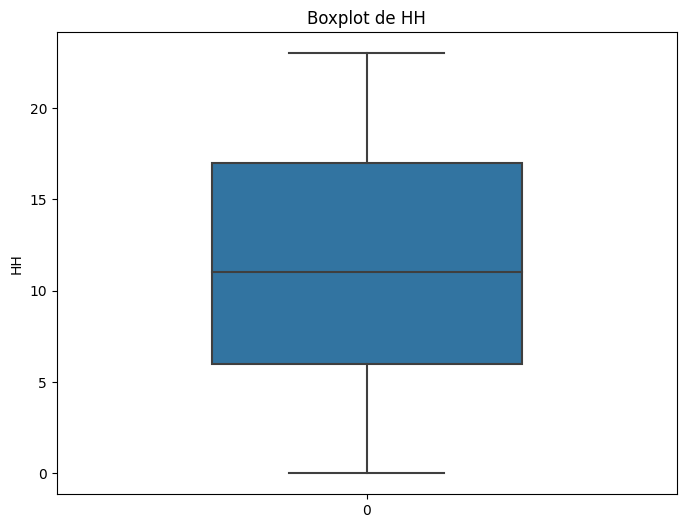

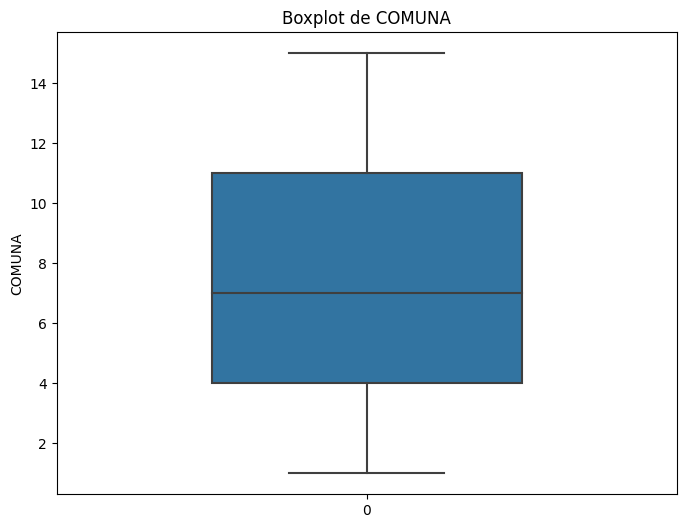

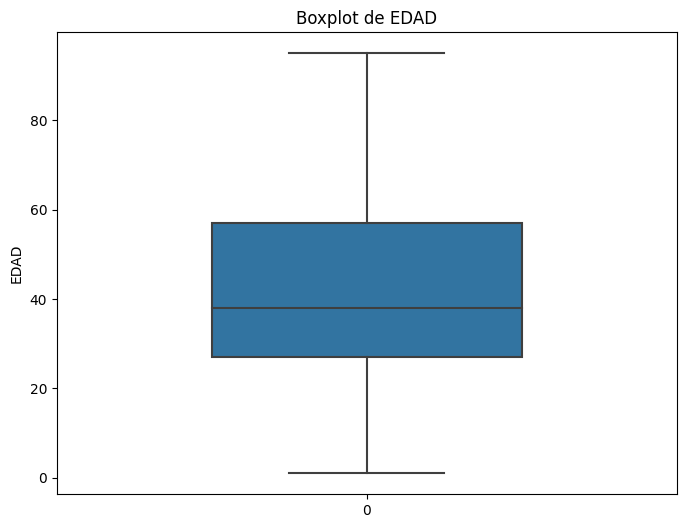

In [310]:
# Crear un boxplot para cada columna numérica usando Seaborn
for columna in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df3[columna], orient='v', width=0.5)
    plt.title(f'Boxplot de {columna}')
    plt.ylabel(columna)
    plt.show()

### Tratamos outliers

In [311]:
# Eliminar outliers utilizando el método IQR
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= umbral_inferior) & (df[columna] <= umbral_superior)]
    return df_filtrado

In [312]:
# Eliminar outliers de cada columna numérica
for columna in columnas_numericas:
    df3 = eliminar_outliers(df3, columna)

## 6. Análisis Exploratorio y Visualuzación de Datos

![Imgur](https://i.imgur.com/AHvfVC7.png)